# Preprocess data of different files
From raw survey data relevant columns are extracted converted to numerical values and used to create new interesting columns. It outputs the data to the output_path specified.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
from datetime import datetime

# Preprocessing of Daten_Messung_210826_Gelenkbus_5430.xlsx and Daten_Messung_211123_Gelenkbus_5431.xlsx

In [3]:
# Importing survey data
data_path = 'data/raw/Daten_Messung_210826_Gelenkbus_5430.xlsx'
df1 = pd.read_excel(data_path, index_col=0)
df1['dataset'] = 'August'

data_path = 'data/raw/Daten_Messung_211123_Gelenkbus_5431.xlsx'
df2 = pd.read_excel(data_path, index_col=0)
df2['dataset'] = 'November'

data_path = 'data/raw/Daten_Messung_220330_Gelenkbus_5431.xlsx'
df3 = pd.read_excel(data_path, index_col=0)
df3['dataset'] = 'March'

data_path = 'data/raw/Daten_Messung_220407_Gelenkbus_5430.xlsx'
df4 = pd.read_excel(data_path, index_col=0)
df4['dataset'] = 'April'

output_path = 'data/output/data_complete_grouped_'+ datetime.date(datetime.now()).__str__() + '.csv'

In [4]:
df = pd.concat([df1, df2, df3, df4])

In [5]:
df

,Outside Temperature,Avg. Temperature,Feet temperature,Temperature difference,RH,va,Tg,Gender,Age,Height,...,Thermal comfort (global),Thermal comfort (head),Thermal comfort (hands),Thermal comfort (feet),Position,Window / alley,Duration,Icl,dataset,Activity
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-08-26 08:52:06.795000,15.69,18.560,17.440,2.920,73.440,0.040,17.870,0,23,169,...,0,0.0,0.0,0.0,Gelenkbereich,Gang,Weniger als 15 Minuten,1.06280,August,NaN
2021-08-28 08:53:29.827000,15.59,19.185,19.220,1.650,74.410,0.155,18.125,1,18,186,...,0,0.0,0.0,0.0,Hinterwagen - Tür,Gang,15 to 30 minutes,0.82065,August,NaN
2021-08-26 08:57:16.568000,15.69,19.580,18.965,1.745,73.255,0.020,18.905,0,33,160,...,0,0.0,0.0,0.0,Hinterwagen - Hinterbereich,Fenster,Less than 15 minutes,0.72045,August,NaN
2021-08-26 08:57:34.979000,15.69,19.105,19.030,1.615,73.275,0.240,18.155,0,26,167,...,1,1.0,1.0,1.0,Hinterwagen - Tür,Fenster,Weniger als 15 Minuten,0.65365,August,NaN
2021-08-26 08:58:22.123000,15.69,19.050,16.810,3.470,77.180,0.240,18.620,0,47,172,...,0,0.0,0.0,0.0,Vorderwagen - Vordere Tür,Gang,Weniger als 15 Minuten,0.74550,August,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/04/07 4:37:58 PM GMT+2,7.90,16.460,15.500,1.370,62.940,0.020,17.060,0,43,163,...,0,0.0,0.0,0.0,Vorderwagen - Zwischen den Türen,Gang,NaN,1.16300,April,1.0
2022/04/07 4:38:06 PM GMT+2,7.90,17.325,14.220,4.035,58.420,0.080,19.155,1,26,180,...,0,0.0,0.0,1.0,Hinterwagen - Hinterbereich,Fenster,Between 0 and 20 minutes,1.27155,April,1.0
2022/04/07 4:42:09 PM GMT+2,7.70,17.020,15.380,1.920,69.170,0.070,16.690,1,27,185,...,1,1.0,1.0,2.0,Vorderwagen - Zwischen den Türen,Fenster,Between 0 and 5 minutes,1.09620,April,1.0


In [5]:
df.columns

Index(['Outside Temperature', 'Avg. Temperature', 'Feet temperature',
       'Temperature difference', 'RH', 'va', 'Tg', 'Gender', 'Age', 'Height',
       'Weight', 'Well-being', 'Thermal feeling (global)',
       'Thermal feeling (head)', 'Thermal feeling (hands)',
       'Thermal feeling (feet)', 'Thermal comfort (global)',
       'Thermal comfort (head)', 'Thermal comfort (hands)',
       'Thermal comfort (feet)', 'Position', 'Window / alley', 'Duration',
       'Icl', 'dataset', 'Activity'],
      dtype='object')

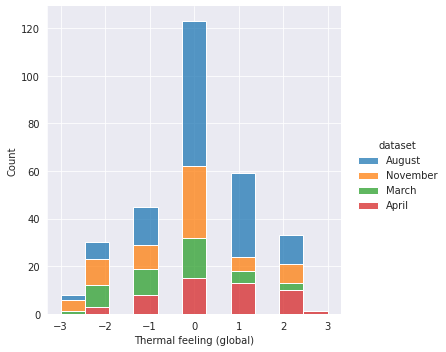

In [6]:
import seaborn as sns

sns.displot(data=df.reset_index(), x='Thermal feeling (global)', hue="dataset", multiple="stack")
plt.show()

In [7]:
df.describe()

,Outside Temperature,Avg. Temperature,Feet temperature,Temperature difference,RH,va,Tg,Gender,Age,Height,...,Thermal feeling (global),Thermal feeling (head),Thermal feeling (hands),Thermal feeling (feet),Thermal comfort (global),Thermal comfort (head),Thermal comfort (hands),Thermal comfort (feet),Icl,Activity
count,299.000000,299.000000,299.000000,299.000000,299.000000,289.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,297.000000,298.000000,297.000000,299.000000,298.000000,298.000000,298.000000,299.000000,166.000000
mean,12.634448,18.432746,16.881187,2.538783,60.938512,0.108858,18.181388,0.458194,37.301003,171.983278,...,-0.003344,0.124579,0.073826,-0.117845,0.321070,0.265101,0.328859,0.352349,0.965281,0.987952
std,4.514432,3.787157,4.456206,1.302612,12.479144,0.100342,4.000130,0.499084,17.546765,14.600372,...,1.210963,1.115600,5.970290,1.369153,0.576897,0.544507,0.618927,0.646158,0.268261,0.109431
min,5.200000,10.640000,2.545000,0.845000,31.980000,0.000000,9.810000,0.000000,0.000000,0.000000,...,-3.000000,-3.000000,-3.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.311300,0.000000
25%,7.900000,16.047500,13.017500,1.630000,54.180000,0.030000,14.630000,0.000000,24.000000,165.000000,...,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.753850,1.000000
50%,13.100000,19.120000,17.870000,2.240000,60.850000,0.080000,18.690000,0.000000,34.000000,172.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970950,1.000000
75%,17.150000,21.375000,20.030000,3.022500,71.700000,0.160000,21.220000,1.000000,47.000000,180.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.167175,1.000000
max,19.200000,24.925000,25.095000,7.830000,86.160000,0.705000,25.310000,1.000000,87.000000,200.000000,...,3.000000,3.000000,100.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.847700,1.000000


In [52]:
interesting_columns =['dataset','Outside Temperature', 'Avg. Temperature', 'RH', 'va', 'Tg', 'Gender', 'Age', 'Height',
       'Weight', 'Duration',
       'Icl', 'Thermal feeling (global)']

In [8]:
df = df[interesting_columns]

NameError: name 'interesting_columns' is not defined

In [54]:
list(df['Duration'].unique())

['Weniger als 15 Minuten',
 '15 to 30 minutes',
 'Less than 15 minutes',
 '15 bis 30 Minuten',
 '45 Minuten bis 1 Stunde',
 'Länger als 1 Stunde',
 '30 bis 45 Minuten',
 nan,
 'Between 0 and 10 minutes',
 'Between 0 and 15 minutes',
 'Between 0 and 20 minutes',
 'Between 0 and 25 minutes',
 'Between 10 and 25 minutes',
 'Between 10 and 30 minutes',
 'Between 0 and 5 minutes',
 'Between 10 and 15 minutes',
 'Between 15 and 20 minutes',
 'Between 20 and 35 minutes',
 'Between 15 and 30 minutes',
 'Between 30 and 45 minutes',
 'Between 15 and 25 minutes',
 'Between 30 and 35 minutes']

In [55]:
duration_map = {'Weniger als 15 Minuten': 7.5,
 '15 to 30 minutes': 22.5,
 'Less than 15 minutes': 7.5,
 '15 bis 30 Minuten': 22.5,
 '45 Minuten bis 1 Stunde': 52.5,
 'Länger als 1 Stunde': 60,
 '30 bis 45 Minuten': 37.5,
 'Between 0 and 10 minutes': 5,
 'Between 0 and 15 minutes': 7.5,
 'Between 0 and 20 minutes': 10,
 'Between 0 and 25 minutes': 12.5,
 'Between 10 and 25 minutes': 17.5,
 'Between 10 and 30 minutes': 20,
 'Between 0 and 5 minutes': 2.5,
 'Between 10 and 15 minutes': 12.5,
 'Between 15 and 20 minutes':17.5,
 'Between 20 and 35 minutes':27.5,
 'Between 15 and 30 minutes': 22.5,
 'Between 30 and 45 minutes': 37.5,
 'Between 15 and 25 minutes': 20,
 'Between 30 and 35 minutes': 32.5}

In [56]:
df['Duration'] = df['Duration'].replace(duration_map)

/tmp/ipykernel_34286/1387134683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration'] = df['Duration'].replace(duration_map)


In [57]:
df.dropna(inplace=True)

/tmp/ipykernel_34286/658506679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [58]:
df=df[(df['Height']>0) & (df['Weight']>0) & (df['Age']>0)]

In [59]:
'''def function(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

df['Thermal feeling (global)'] = df['Thermal feeling (global)'].apply(function)'''

/tmp/ipykernel_34286/1789189082.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Thermal feeling (global)'] = df['Thermal feeling (global)'].apply(function)


In [60]:
df.to_csv(output_path, index=False)